# Pancreatic endocrinogenesis

data from [Bastidas-Ponce et al. (2018)](https://dev.biologists.org/content/146/12/dev173849.abstract). A comprehensive description of the code below will follow.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import scvelo as scv
scv.logging.print_version()

Running scvelo 0.1.24 (python 3.7.3) on 2019-10-28 19:31.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

### Load and cleanup the data

In [3]:
adata = scv.datasets.pancreatic_endocrinogenesis()

In [4]:
# show proportions of spliced/unspliced abundances
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.83 0.17]


AnnData object with n_obs × n_vars = 3696 × 27998 
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

### Preprocess the data

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)


Filtered out 20801 genes that are detected in less than 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:04) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


### Compute velocity and velocity graph

In [6]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


### Plot results

Finally, the velocities are projected onto any embedding specified in `basis` and visualized in one of three available ways: on single cell level, on grid level, or as streamplot as shown here.

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


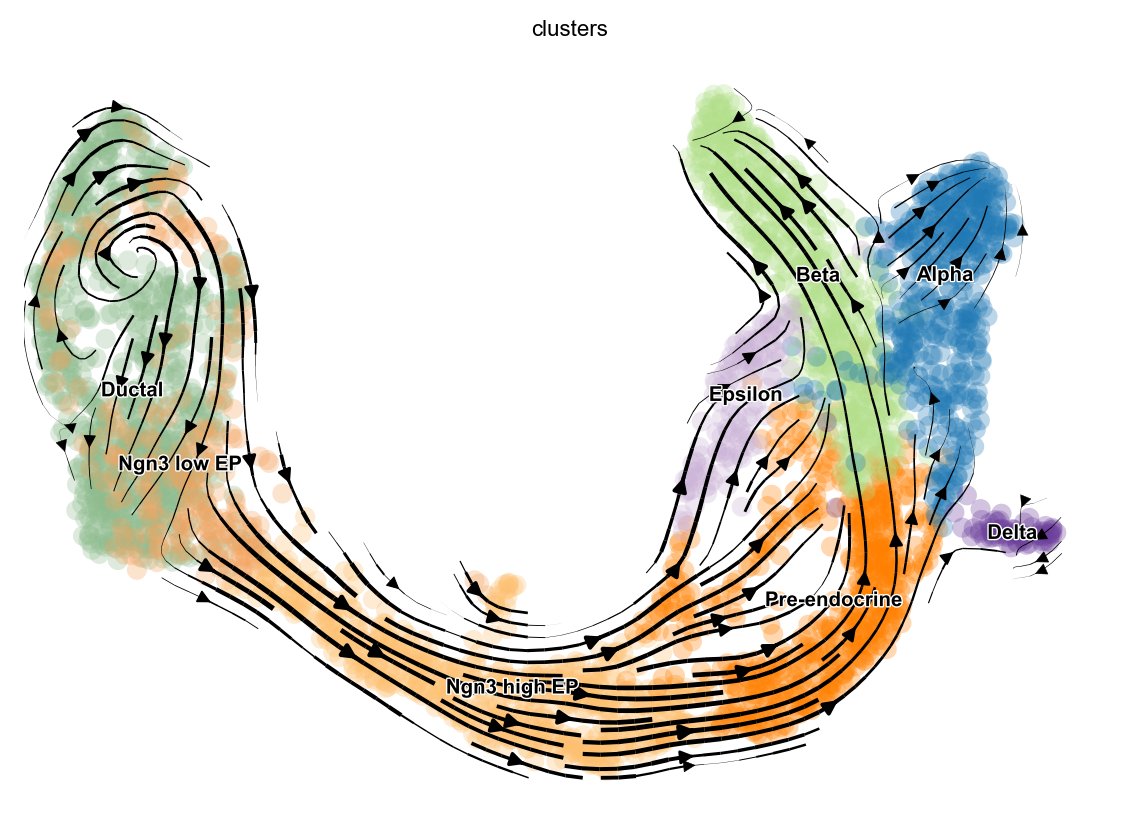

In [8]:
scv.pl.velocity_embedding_stream(adata, basis='umap')


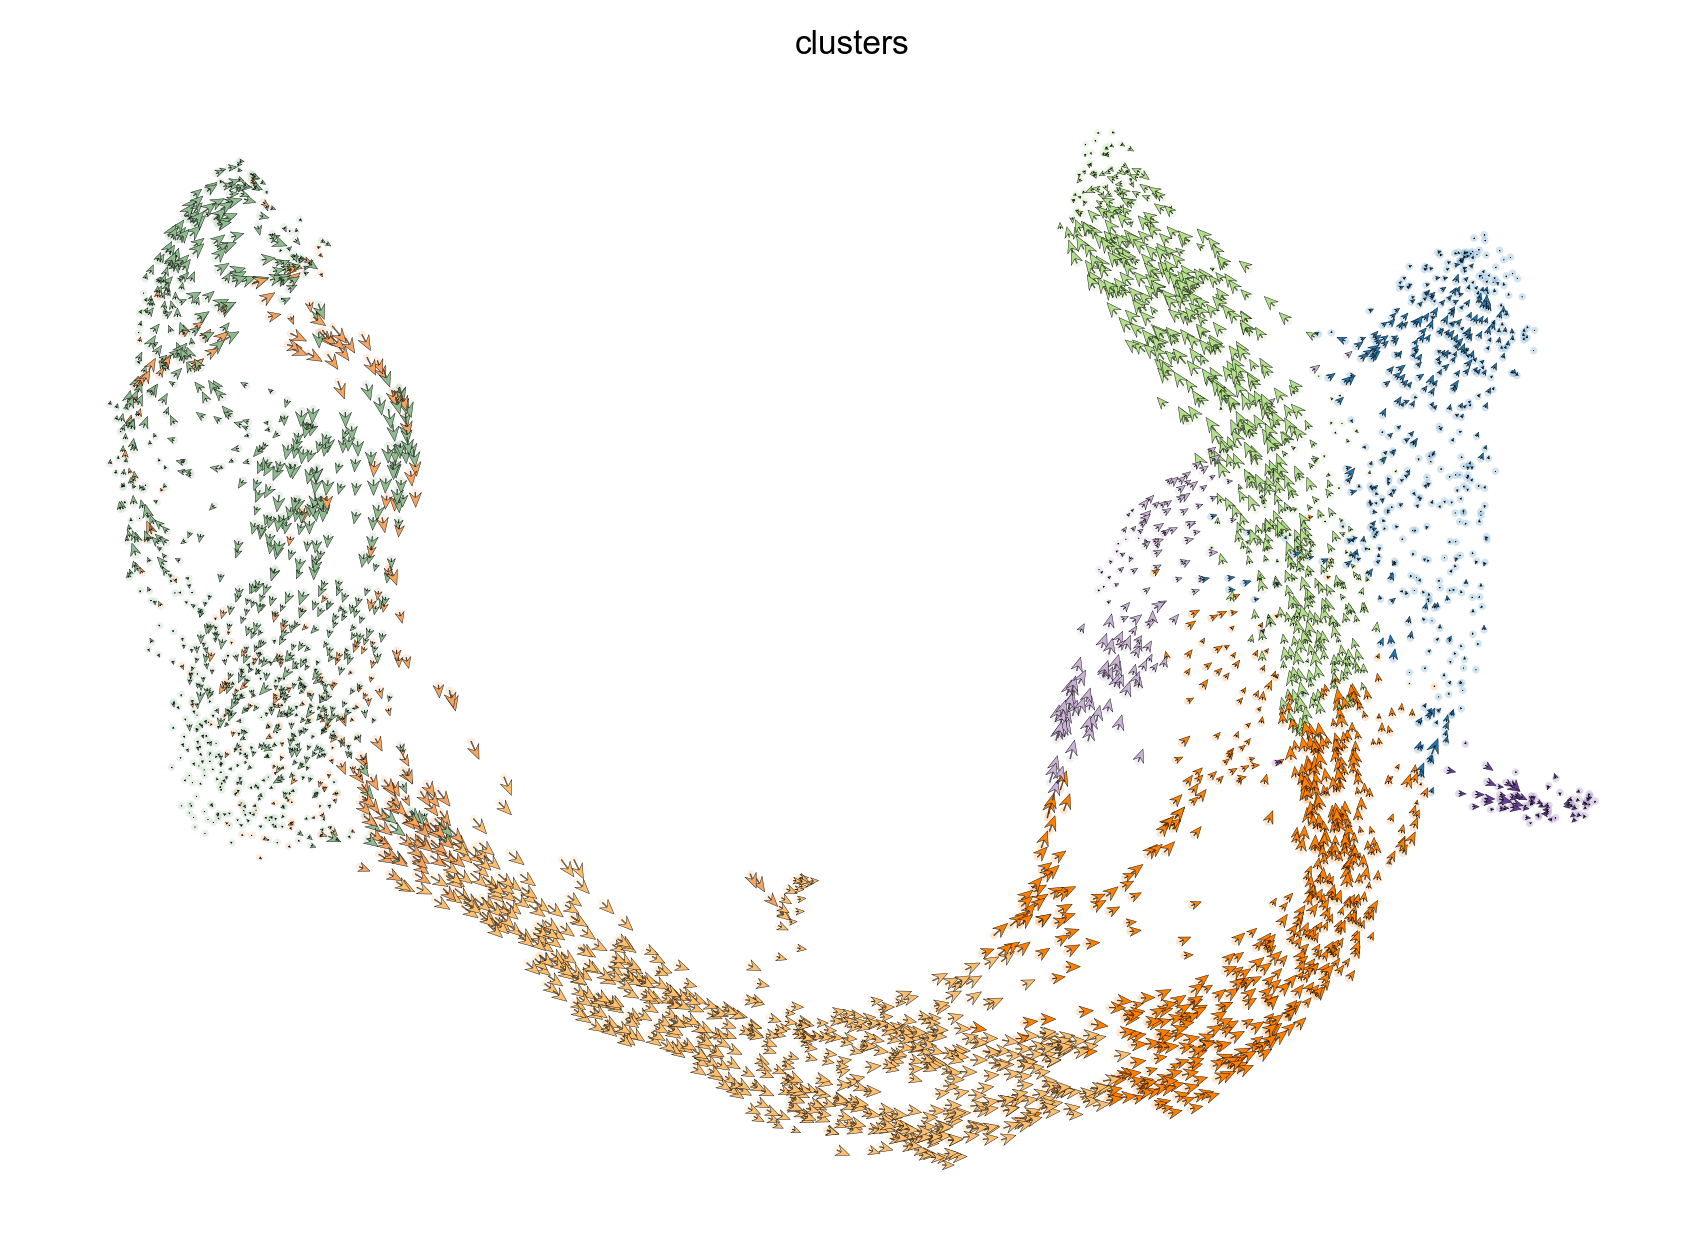

In [11]:
scv.pl.velocity_embedding(adata, basis='umap', arrow_length=2, arrow_size=1.5, dpi=150)


In [12]:
scv.tl.recover_dynamics(adata)

recovering dynamics
    finished (0:11:55) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [14]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing latent time
    finished (0:00:02) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_7.pdf


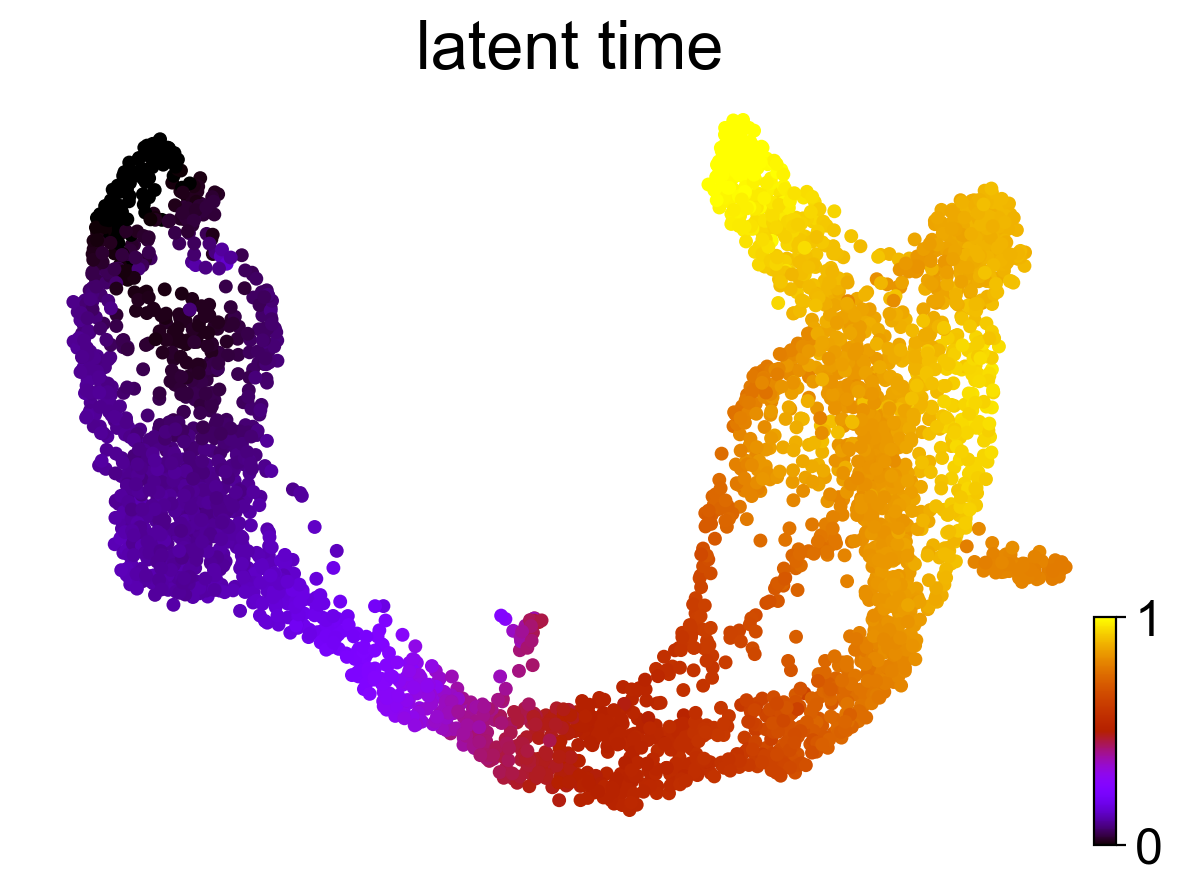

In [16]:
scv.tl.recover_latent_time(adata)

scv.pl.scatter(adata, color='latent_time', fontsize=24, size=100,
               color_map='gnuplot', perc=[2, 98], colorbar=True, rescale_color=[0,1])

saving figure to file ./figures/scvelo_heatmap_8.png


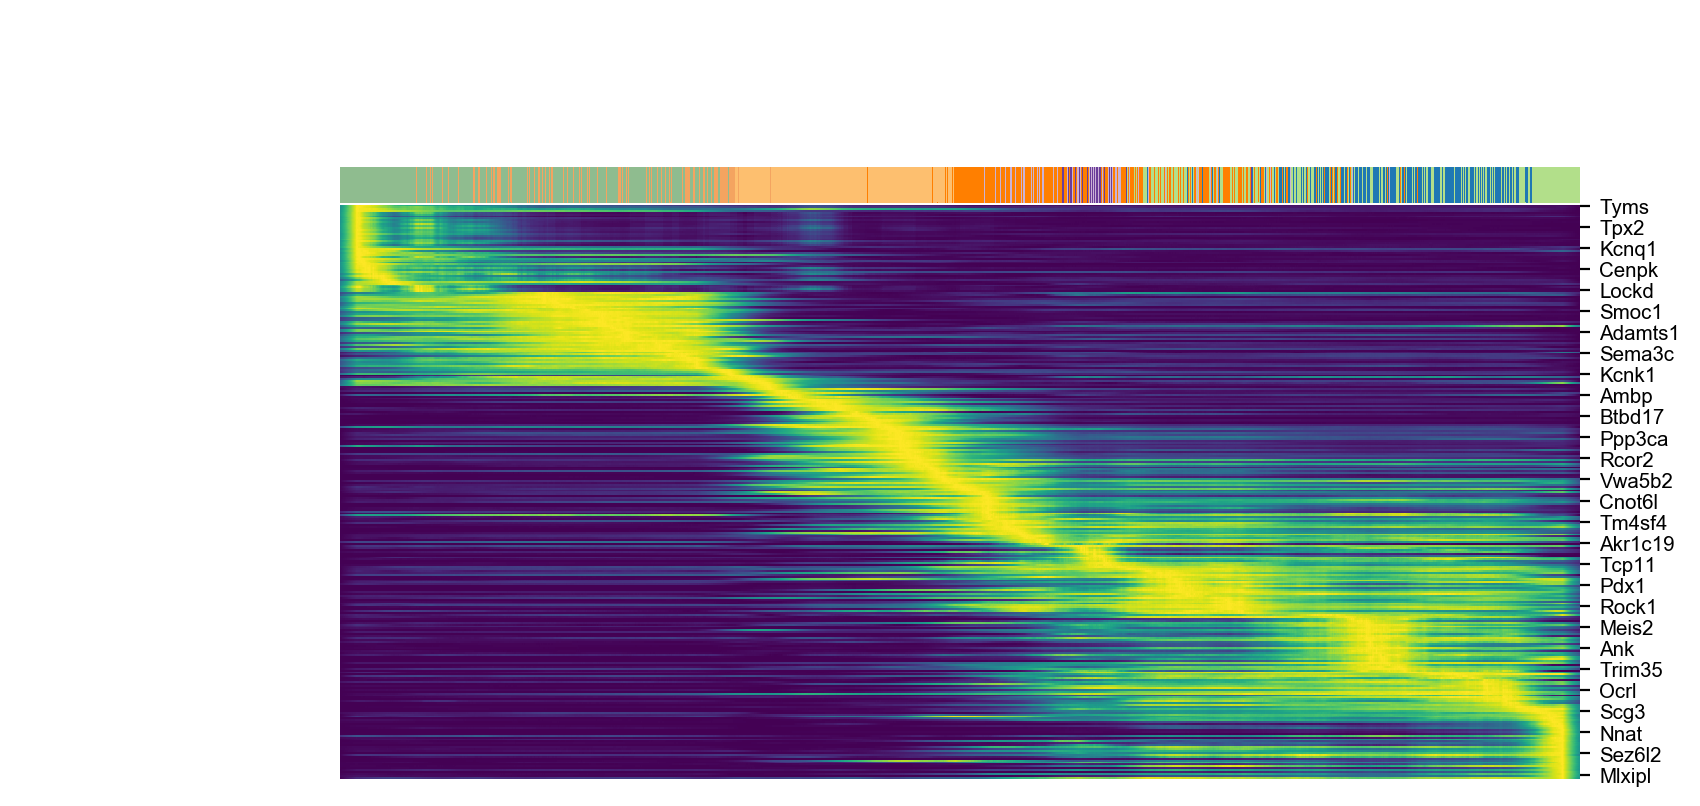

In [17]:
top_genes = adata.var_names[adata.var.fit_likelihood.argsort()[::-1]][:300]
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', n_convolve=100, col_color='clusters')

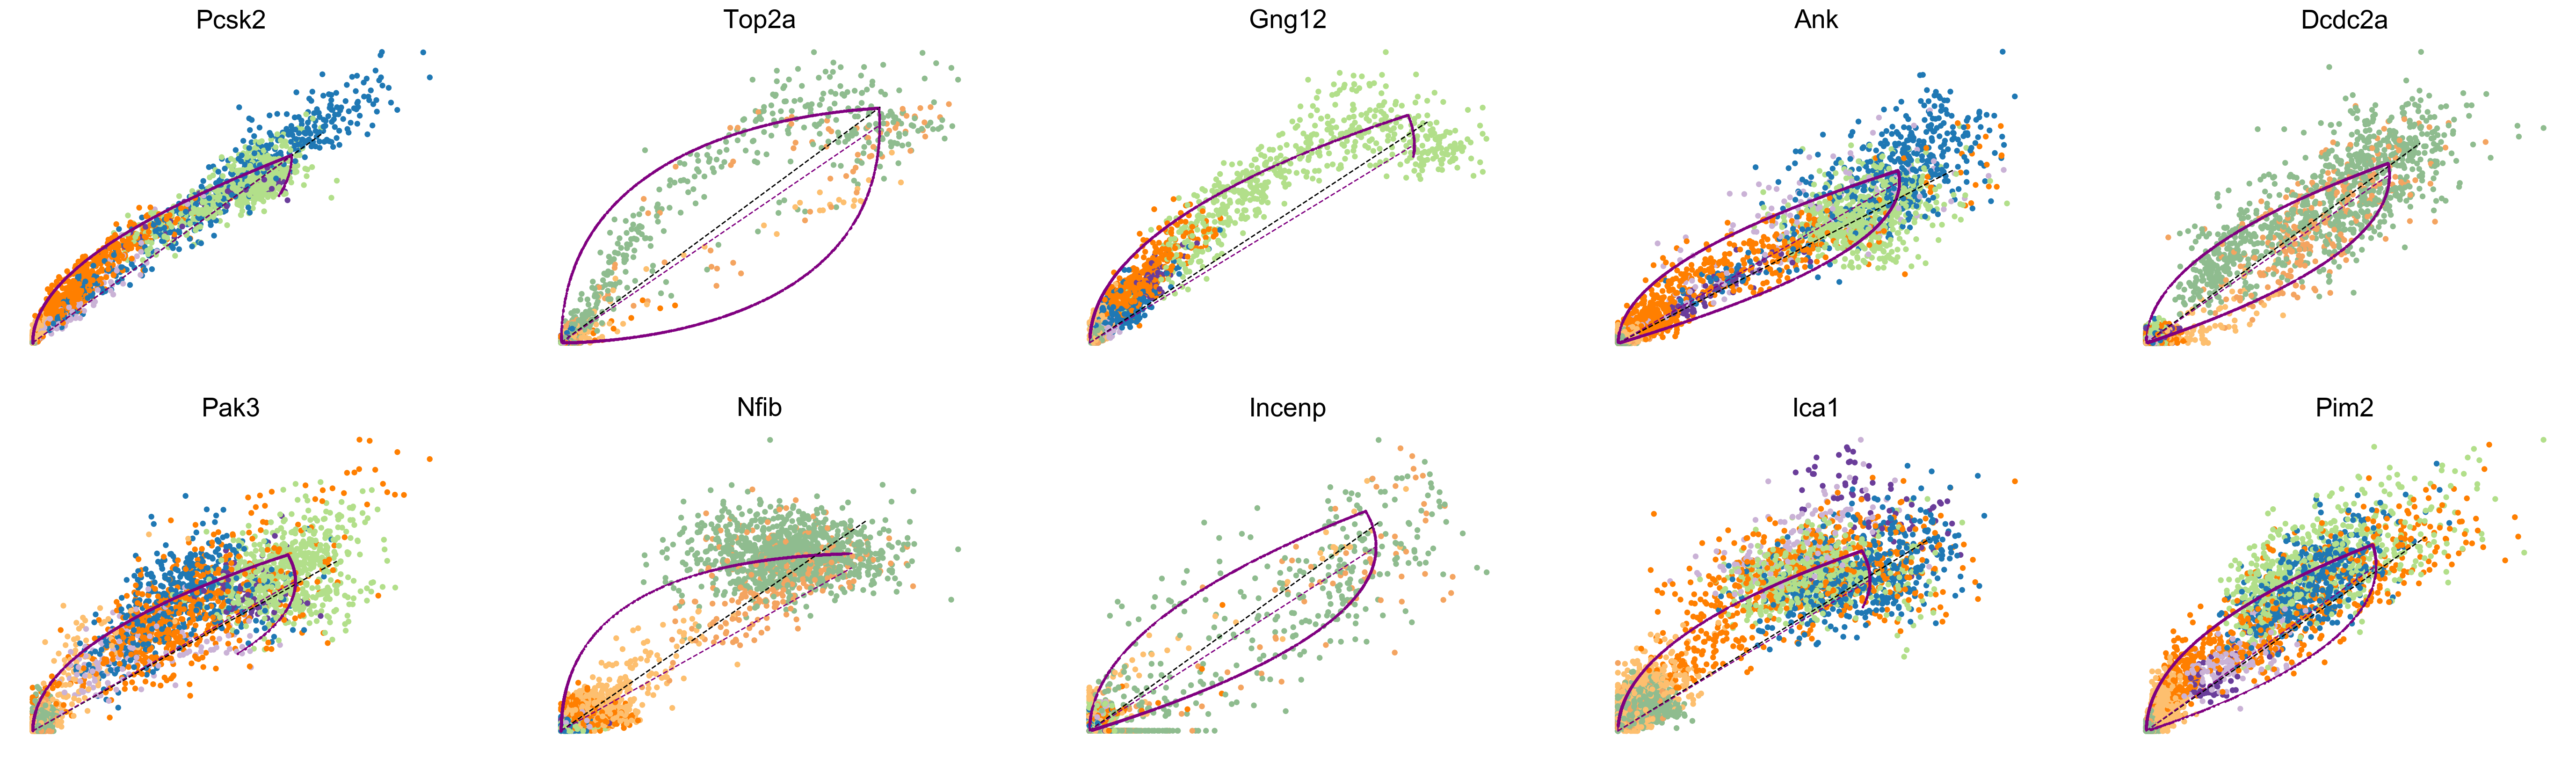

In [18]:
scv.pl.scatter(adata, basis=top_genes[:10], legend_loc='none', 
               size=80, frameon=False, ncols=5, fontsize=20)

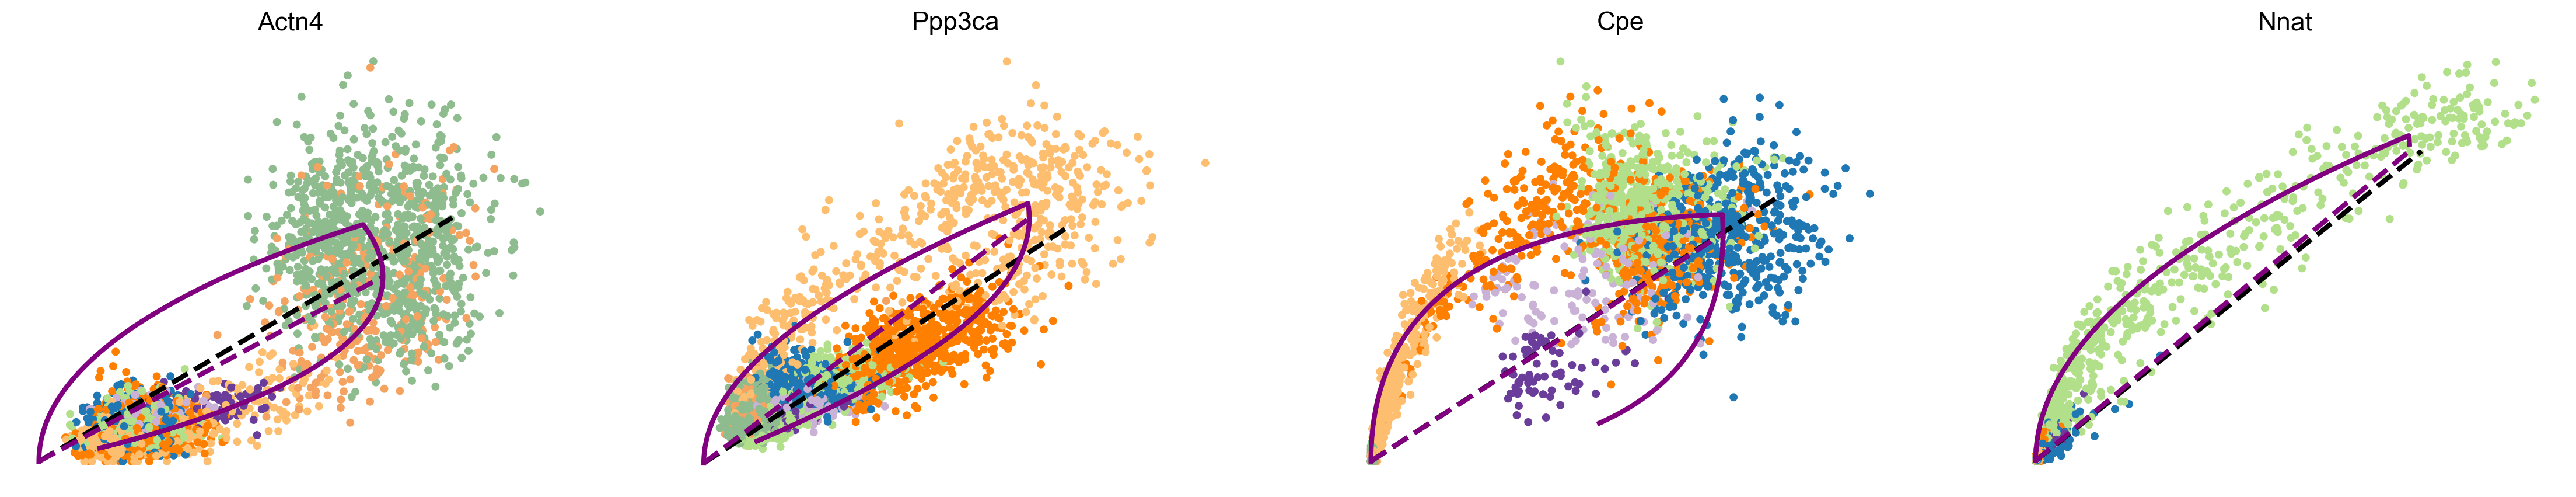

In [19]:
scv.pl.scatter(adata, basis=['Actn4', 'Ppp3ca', 'Cpe', 'Nnat'], fontsize=16, size=100, linewidth=3,
               frameon=False, legend_loc='none')

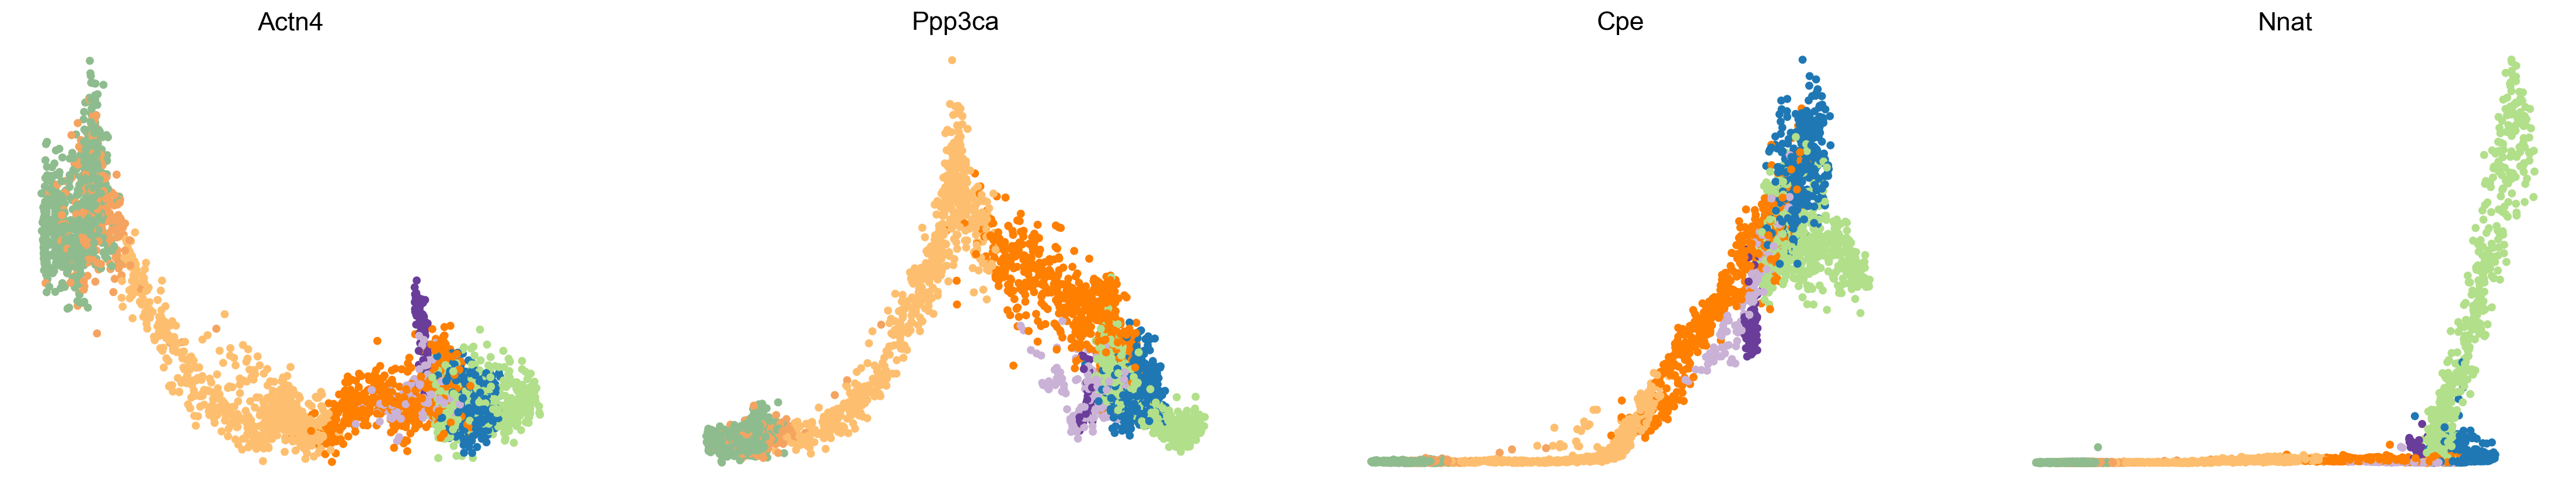

In [20]:
scv.pl.scatter(adata, x='latent_time', y=['Actn4', 'Ppp3ca', 'Cpe', 'Nnat'], fontsize=16, size=100, 
               n_convolve=None, frameon=False, legend_loc='none')

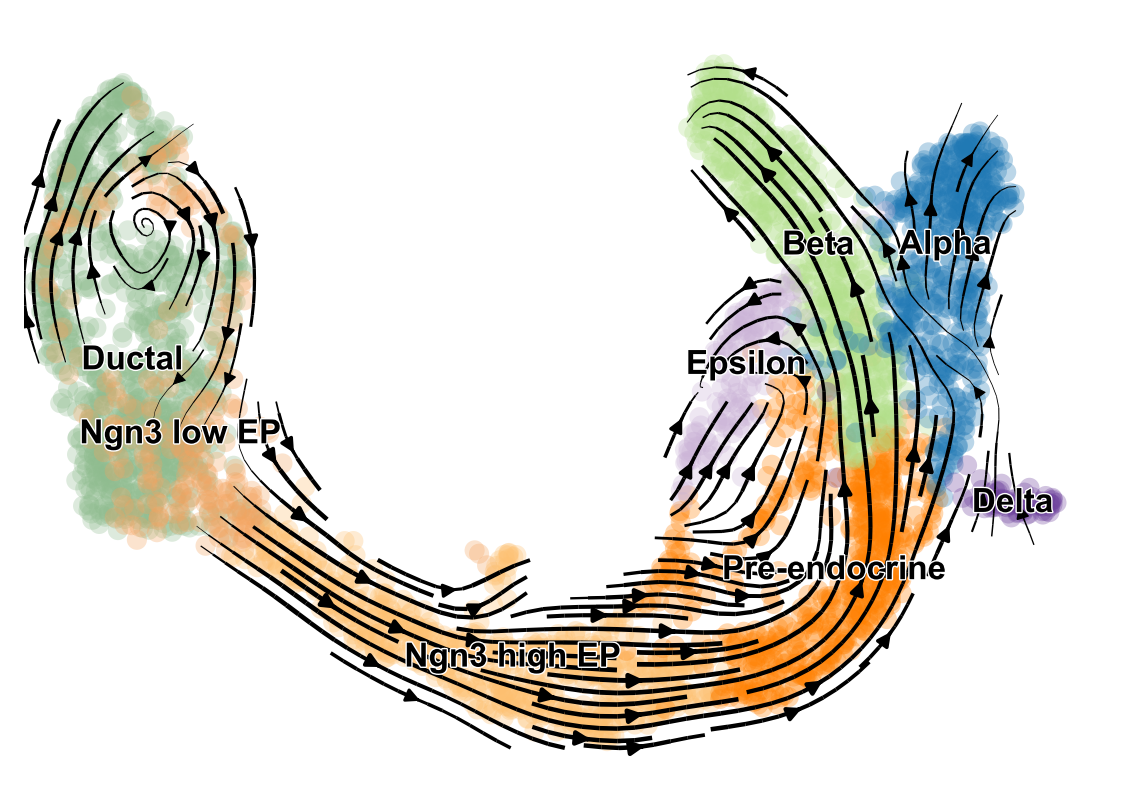

In [30]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=12, title='', smooth=.8, min_mass=4)